In [1]:
from sklearn import ensemble, datasets
import numpy as np
import matplotlib
from matplotlib import pyplot as plt


In [2]:
from torchvision.datasets import EMNIST

In [3]:
train = EMNIST(root="/Users/Noah QH/Downloads/emnist/", train=True, split="digits", download=True)
test = EMNIST(root="/Users/Noah QH/Downloads/emnist/", train=False, split="digits", download=True)

In [4]:
x_train, y_train = train.data.flatten(1, 2), train.targets
x_test, y_test = test.data.flatten(1, 2), test.targets

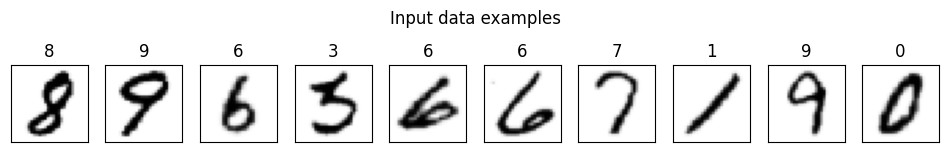

In [5]:
plt.figure(figsize=(12, 1))
plt.title("Input data examples", pad=30)
plt.axis('off')
colormap = matplotlib.colormaps["Greys"]
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.box(True)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.title(f'{y_train[i]}')
  plt.imshow(np.resize(x_train[i], (28, 28)).T, cmap=colormap)
plt.show()

In [26]:
rfc = ensemble.RandomForestClassifier(n_estimators=10, max_depth=None)
bagged_rfc = ensemble.BaggingRegressor(rfc, n_jobs=-1)
bagged_rfc.fit(x_train, y_train)

BaggingRegressor(estimator=RandomForestClassifier(max_depth=10,
                                                  n_estimators=10),
                 n_jobs=-1)

In [27]:
y_pred = bagged_rfc.predict(x_test).astype(int).flatten()

In [28]:
error = (np.array(y_test) == y_pred)
correct = sum(error)
incorrect = len(y_test) - correct
accuracy = correct / (correct + incorrect)

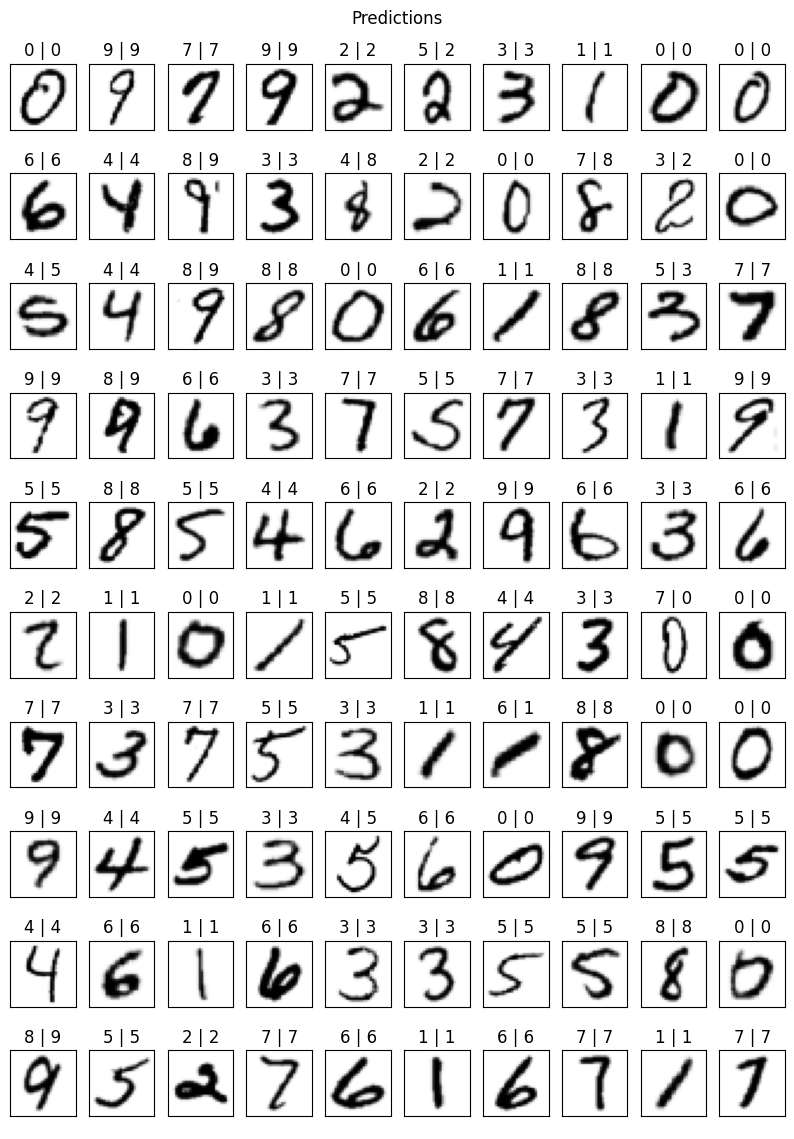

In [29]:
plt.figure(figsize=(10, 14))
plt.title("Predictions", pad=20)
plt.axis('off')
colormap = matplotlib.colormaps["Greys"]
for i in range(100):
  plt.subplot(10, 10, i + 1)
  plt.box(True)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.title(f'{y_pred[i]} | {y_test[i]}')
  plt.imshow(np.resize(x_test[i], (28, 28)).T, cmap=colormap)
plt.show()

In [30]:
print(f'Accuracy: {accuracy} ({correct} / {correct + incorrect} correct)')

Accuracy: 0.908175 (36327 / 40000 correct)
